In [1]:
from network import CNetwork

In [2]:
import pandas as pd
import numpy as np

In [3]:
import os

In [4]:
name_dataset = "dataset_1"
dataset_path = "datasetsv2/"
length_cut = 500
random_flag = 1
dimension = 2
feature_selection = 'top_50'
lemmatization_flag = True

In [5]:
df = pd.read_csv(dataset_path + name_dataset + ".csv")

In [6]:
df.head(5)

,label,text,book
0,Pelham Grenville,"\n\n\n\n\n\n\n\nProduced by Christine Gehring,...",Right Ho Jeeves
1,Pelham Grenville,"\n\n\n\n\n\n\n\nProduced by Suzanne L. Shell, ...",Tales Of St Austin
2,Joseph Conrad,And that last\n\nword was the single word of ...,Victory
3,Joseph Conrad,\n\n\n\nIf I have ever had these gifts in any ...,Under Western Eyes
4,Bram Stoker,\n\n\n\n Lond...,The Lady Of The Shroud


In [7]:
from utils.text_processing import get_min_len_corpus

In [8]:
min_len_book = get_min_len_corpus(list(df["text"]))

In [9]:
print("Min Length:", min_len_book)

Min Length: 55024


In [10]:
from utils.text_processing import partition_text, get_process_corpus

In [11]:
texts = list(df['text'])

In [12]:
labels = list(df['label'])

In [13]:
corpus, segmented_corpus, labels = partition_text(texts, labels, length_cut, min_len_book, random_flag)

Max partitions:  110


In [14]:
selected_corpus, words_features, word_index, index_word = get_process_corpus(segmented_corpus, remove_punctuation_flag=True, lemmatization_flag=lemmatization_flag, feature_selection = feature_selection)

In [15]:
wor = [(index_word[w],w) for w in selected_corpus[1]]

In [16]:
wor

[('the', '136'),
 ('ball', '391'),
 ('soared', '347'),
 ('to', '225'),
 ('the', '136'),
 ('very', '312'),
 ('opposite', '380'),
 ('quarter', '342'),
 ('of', '96'),
 ('the', '136'),
 ('field', '255'),
 ('It', '76'),
 ('wa', '18'),
 ('a', '61'),
 ('fine', '404'),
 ('exhibition', '242'),
 ('of', '96'),
 ('hitting', '382'),
 ('but', '79'),
 ('Pillingshot', '357'),
 ('felt', '306'),
 ('that', '50'),
 ('he', '175'),
 ('would', '220'),
 ('have', '162'),
 ('enjoyed', '327'),
 ('it', '116'),
 ('more', '352'),
 ('if', '145'),
 ('he', '175'),
 ('could', '69'),
 ('have', '162'),
 ('watched', '310'),
 ('it', '116'),
 ('from', '177'),
 ('a', '61'),
 ('deck-chair', '400'),
 ("'You", '260'),
 ("'re", '349'),
 ('coming', '250'),
 ('on', '135'),
 ('a', '61'),
 ('a', '61'),
 ('deep', '267'),
 ('field', '255'),
 ('young', '396'),
 ('Pillingshot', '357'),
 ('said', '275'),
 ('Scott', '356'),
 ('a', '61'),
 ('he', '175'),
 ('took', '360'),
 ('off', '174'),
 ('his', '44'),
 ('pad', '406'),
 ("'You", '260'),


In [17]:
len(words_features)

50

In [18]:
words_features

{'a': 0,
 'and': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'to': 5,
 'it': 6,
 'that': 7,
 'with': 8,
 'at': 9,
 'wa': 10,
 'for': 11,
 'had': 12,
 'not': 13,
 'but': 14,
 'be': 15,
 'I': 16,
 'have': 17,
 'an': 18,
 'on': 19,
 'this': 20,
 'by': 21,
 'he': 22,
 'his': 23,
 'all': 24,
 'which': 25,
 'from': 26,
 'is': 27,
 'The': 28,
 'so': 29,
 'or': 30,
 'were': 31,
 'him': 32,
 'if': 33,
 'would': 34,
 'one': 35,
 'been': 36,
 'no': 37,
 'me': 38,
 'my': 39,
 'there': 40,
 'could': 41,
 'It': 42,
 'they': 43,
 'you': 44,
 'out': 45,
 'very': 46,
 'some': 47,
 'more': 48,
 'what': 49}

In [19]:
word_index["the"]

'136'

In [20]:
len(selected_corpus)

78

In [21]:
total_classes = list(set(labels))  ## or author
print("Total classes: {}".format(len(total_classes)))
number_books = (df[df['label'] == total_classes[0]]).shape[0]
print("Total entities for each class in train: {}".format(number_books))
dict_categories = {cat: index for index, cat in enumerate(total_classes)}

Total classes: 13
Total entities for each class in train: 6


In [22]:
y = [dict_categories[y] for y in labels]

In [23]:
total_classes

['Bram Stoker',
 'Daniel Defoe',
 'Hector Hugh',
 'George Eliot',
 'Pelham Grenville',
 'Mark Twain',
 'Charles Dickens',
 'Thomas Hardy',
 'Allan Poe',
 'Arthur Conan Doyle',
 'Jane Austen',
 'Joseph Conrad',
 'Charles Darwin']

In [24]:
input_path = "struc2vec/graph/"+str(length_cut)+"_"+str(dimension)+"/"
output_path = "struc2vec/emb/"+str(length_cut)+"_"+str(dimension)+"/"    

In [25]:
len(words_features)

50

In [26]:
def read_struc2vec(networks, words_features):
    all_network_features = np.zeros([len(networks),len(words_features)*dimension])
    for i, netw in enumerate(networks):
        with open(output_path+str(i)+".emb", "r") as f:
            network_features = np.zeros([len(words_features),dimension])
            lines = f.readlines()
            num_token, dim = lines[0].split()
            for l in lines[1:]:
                row = l.strip().split(" ")
                id_node = row[0]
                if index_word[id_node].lower() in words_features:
                    emb = [float(v) for v in row[1:]]
                    network_features[words_features[index_word[id_node].lower()]] = emb
                    print("found")
            print(i)
            network_features = np.array(network_features).flatten()
            print(str(i), "len", len(network_features))
            all_network_features[i] = network_features   
    return all_network_features

In [39]:
def struc2vec(operating_system, networks):
    try: 
        os.mkdir(input_path)
        os.mkdir(output_path)
    except:
        print("Existe")
    for i, netw in enumerate(networks):
        with open((input_path+str(i)+".edgelist"), "w") as f:
            v_names = netw.vs["name"]
            for edge in netw.get_edgelist():
                (u,v) = edge
                f.write(v_names[u] +" "+ v_names[v]+'\n')
    for i, netw in enumerate(networks):
        if operating_system == 'linux':
            path_command = "python struc2vec/src/main.py --input "+input_path+str(i)+".edgelist --output "+output_path+str(i)+".emb --num-walks 20 --walk-length 80 --window-size 2 --dimensions "+str(dimension)+" --OPT1 True --OPT2 True --OPT3 True --until-layer 6"
            #path_command = 'python struc2vec/src/graph2vec.py --input-path ' + in_network + ' --output-path ' + extra_file + ' --dimensions ' + str(512)
            os.system(path_command)
            print("struc2vec", str(i),len(netw.vs["name"]))

In [40]:
def get_struc2vec_features(sequences, words_features, index_word):
    nets = []
    for text in sequences:
        obj = CNetwork(text, model=None, index_word=index_word, percentages=None, path="")
        network = obj.create_network()
        nets.append(network)
    struc2vec("linux", nets)
    X = read_struc2vec(nets, words_features)
    return X

In [41]:
X = get_struc2vec_features(selected_corpus, words_features, index_word)

Nodes: 242 - Edges: 378
Nodes: 235 - Edges: 399
Nodes: 231 - Edges: 405
Nodes: 246 - Edges: 406
Nodes: 217 - Edges: 389
Nodes: 236 - Edges: 407
Nodes: 241 - Edges: 410
Nodes: 259 - Edges: 423
Nodes: 225 - Edges: 396
Nodes: 235 - Edges: 412
Nodes: 229 - Edges: 389
Nodes: 202 - Edges: 388
Nodes: 265 - Edges: 421
Nodes: 220 - Edges: 412
Nodes: 240 - Edges: 421
Nodes: 223 - Edges: 408
Nodes: 218 - Edges: 405
Nodes: 247 - Edges: 419
Nodes: 211 - Edges: 367
Nodes: 229 - Edges: 418
Nodes: 254 - Edges: 409
Nodes: 237 - Edges: 417
Nodes: 238 - Edges: 396
Nodes: 249 - Edges: 419
Nodes: 211 - Edges: 391
Nodes: 242 - Edges: 406
Nodes: 246 - Edges: 413
Nodes: 257 - Edges: 408
Nodes: 247 - Edges: 394
Nodes: 234 - Edges: 383
Nodes: 213 - Edges: 376
Nodes: 254 - Edges: 420
Nodes: 239 - Edges: 386
Nodes: 258 - Edges: 418
Nodes: 194 - Edges: 384
Nodes: 219 - Edges: 390
Nodes: 229 - Edges: 396
Nodes: 214 - Edges: 362
Nodes: 254 - Edges: 408
Nodes: 220 - Edges: 403
Nodes: 234 - Edges: 407
Nodes: 239 - Edg

/home/lauracq/project/book_classification/struc2vec/src/algorithms_distances.py:541: RuntimeWarning: invalid value encountered in double_scalars
  e_list = [x / sum_w for x in e_list]


struc2vec 57 250
struc2vec 58 212
struc2vec 59 205
struc2vec 60 210
struc2vec 61 236
struc2vec 62 206
struc2vec 63 228
struc2vec 64 254
struc2vec 65 225
struc2vec 66 209
struc2vec 67 245
struc2vec 68 236
struc2vec 69 224
struc2vec 70 248
struc2vec 71 265
struc2vec 72 245
struc2vec 73 239
struc2vec 74 241
struc2vec 75 237
struc2vec 76 245
struc2vec 77 235
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
0
0 len 100
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
1
1 len 100
found
found
found
found
found
found
found
found
f

found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
35
35 len 100
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
36
36 len 100
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
37
37 len 100
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
foun

In [42]:
print("Lenght of features:", X.shape)

Lenght of features: (78, 100)


In [43]:
X

array([[ 0.7205109 ,  0.09037238,  2.622211  , ...,  0.        ,
         0.5531308 ,  0.6282765 ],
       [ 3.043885  ,  2.4620957 ,  3.076094  , ...,  2.290386  ,
         0.        ,  0.        ],
       [ 1.6018192 ,  2.686568  ,  1.8031982 , ..., -0.93122697,
         0.        ,  0.        ],
       ...,
       [-1.2490337 ,  4.2656565 , -1.1091605 , ...,  0.5601095 ,
         1.6850103 ,  0.3881133 ],
       [-0.79244   ,  2.6806788 ,  0.1374918 , ...,  0.        ,
        -2.7784004 ,  8.453903  ],
       [-2.439208  , -6.6040955 , -0.17530605, ...,  0.        ,
        -1.0551897 , -2.5746775 ]])

In [44]:
len(X[0])

100

# Visualize

In [45]:
from utils.visualize_tsne import visualize_tsne

/home/lauracq/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lauracq/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


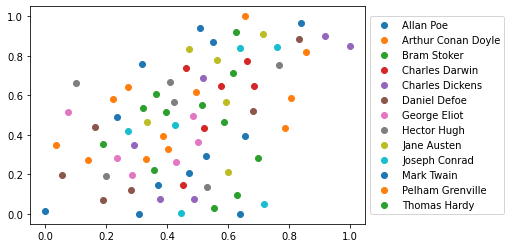

In [46]:
visualize_tsne(X, labels)


# Training with SVM

In [47]:
import classifierv2

In [48]:
obj = classifierv2.Classification(X, y)
scores = obj.classification()

[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [ 0  2 12 11 12  6  2  2 12  7  2  7  4 11 11 11]
Score 0.0625
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [ 0  3  0  8 12  7  2  0  3  6  8  7  0 12  0  8]
Score 0.0625
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [1 1 5 4 8 6 1 1 9 1 8 8 1 4 4 1]
Score 0.1875
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [ 7  6  0  7 12  2  2  1  3  8  8  7 11  3  3  7]
Score 0.1875
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [8 8 2 8 8 6 8 4 8 8 8 6 8 8 8 8]
Score 0.0
